# Computer Lab Exercises week 6 (SOLUTIONS)

* These lab exercises are designed to introduce the use of SQL to extract information from a database.
* These exercises are **not** part of the assessment of the Module.
* I will post the solutions roughly 1 week after this file has been uploaded to the DLE.


* See https://sites.google.com/view/pythonforstemstudents/home for a collection
of links to information on python.


## Question 1  Questions about SQL

Thare is a list of SQL commands at https://www.w3schools.com/sql/sql_syntax.asp.


Download the SQLite file from **SimpleFolks for Simple SQL**
http://2016.padjo.org/files/data/starterpack/simplefolks.sqlite The file simplefolks.sqlite needs to be in the same directory as this notebook.

You can read more about the dataset at http://2016.padjo.org/tutorials/sql-simplefolks-select-from/

The above database has the following tables:
homes, inmates, people, pets and politicians.
The people database has the column names: 
name, sex and age.

Use SQL via python to answer the following questions.


* Find all the names in the people table.
* Find all the names in the people table, for the people younger than 30 years old.
* Find all the names of the men in the people table.
* Find the average age of the people in the people table.
* Find the table names from the database file.


In [1]:
import sqlite3
connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

# you can change the SQL command
cursor.execute("SELECT * FROM people") 
print("List the content of the people table")
result = cursor.fetchall() 
for r in result:
    print(r)


List the content of the people table
('Austin', 'M', 33)
('Blair', 'M', 90)
('Carolina', 'F', 28)
('Dani', 'F', 41)
('Donald', 'M', 70)
('Eliza', 'F', 37)
('Farida', 'F', 23)
('Georgina', 'F', 19)
('Hillary', 'F', 68)
('Leland', 'M', 16)
('Liam', 'M', 22)
('Michael', 'M', 48)
('Phoebe', 'F', 52)
('Sherry', 'F', 39)
('Zed', 'M', 42)


In [2]:
# Put your solution here

In [ ]:
#  Put your solutions here

import sqlite3

connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

##################################################
cursor.execute("SELECT name FROM people") 
print("List of all the  names")
result = cursor.fetchall() 
for r in result:
    print(r[0])


##################################################
cursor.execute("SELECT name FROM people where age < 30") 
print("List of all the  names under 30")
result = cursor.fetchall() 
for r in result:
    print(r[0])

##################################################
cursor.execute("SELECT name FROM people where sex='M' ") 
print("List of males")
result = cursor.fetchall() 
for r in result:
    print(r[0])


##################################################
cursor.execute("SELECT Avg(Age) FROM people") 
result = cursor.fetchall() 
print("Average age = ", result)

##################################################
## https://stackoverflow.com/questions/34570260/how-to-get-table-names-using-sqlite3-through-python/34570549
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
result = cursor.fetchall() 

print("The table names in the database")
for r in result:
    print(r[0])




##  Question 2: SQL and python


We have been using python to run SQL 
queries from a SQLite database. However,
we have used a separate python script for
each query. It would be better to ask the
user for the SQL query.

In [ ]:
sql_ = input("Input SQL command")
print("Executing ", sql_)

Modify the cell above so the user can input an abrbitary SQL statement 
on the simplefolks.sqlite database.
Also include exception handling
to check for errors.



Please read about SQL injection attacks at
https://www.tutlane.com/tutorial/sqlite/sqlite-injection-attacks.
This is just for information.

In [ ]:
# put your solution here

import sqlite3
connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

sql_ = input("Input SQL command")
print("Executing ", sql_)

# you can change the SQL command
try:
  cursor.execute(sql_) 
except:
    print("Error with " , sql_)


print("Results from ", sql_)
result = cursor.fetchall() 
for r in result:
    print(r)

##  Question 3, plotting the data from a database

Use SQL to extract the ages of the Males and Females seperately. Plot the ages of the males and females in the same histogram. The plot should look like the figure below.

![hist_male_female](https://github.com/cmcneile/COMP5000-2023-lab/blob/main/hist_MF.png?raw=true)


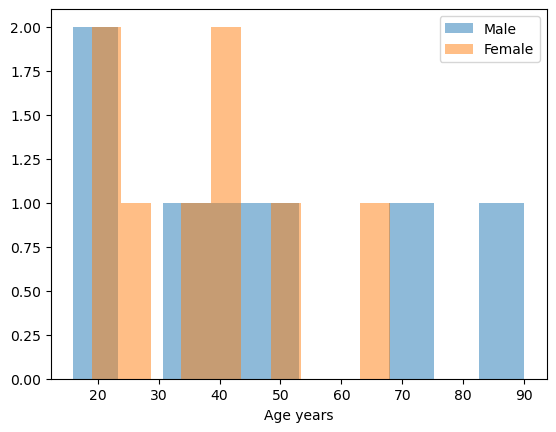

In [1]:
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect("simplefolks.sqlite")
cursor = connection.cursor()

# Find the ages of males
cursor.execute("SELECT age FROM people where sex='M' ") 
result = cursor.fetchall() 
male_age = []
for r in result:
    male_age.append(r[0])

# Find the ages of females
cursor.execute("SELECT age FROM people where sex='F' ") 
result = cursor.fetchall() 
female_age = []
for r in result:
    female_age.append(r[0])


# The alpha parameter controls the transparancy of the hstogram  
# https://www.adamsmith.haus/python/answers/how-to-plot-two-histograms-on-one-plot-using-matplotlib-in-python
plt.hist(male_age, label="Male", alpha=0.5,)
plt.hist(female_age, label="Female" , alpha=0.5,)
plt.xlabel("Age years")
plt.legend()
plt.show()

## Question 4 (HARDER)

The database car_crashes.db (available on the DLE) contains information about car accidents in the USA.
The data is described in 

https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-bad-drivers-dataset

Use SQL to find for Texas (TX)
* Number of drivers involved in fatal collisions per billion miles
* Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
* Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired

The first goal is to find the structure of the tables in the database.

In [1]:
!ls -l car_crashes.db 


import sqlite3
connection = sqlite3.connect("car_crashes.db")
#connection.text_factory = lambda b: b.decode('UTF-8')

cursor = connection.cursor()
cursor.execute("SELECT * FROM sqlite_master WHERE type='table';") 

result = cursor.fetchall() 
for r in result:
    print(r)



-rw-rw-r-- 1 cmcneile cmcneile 12288 Nov  5 21:52 car_crashes.db
('table', 'Observation', 'Observation', 2, 'CREATE TABLE "Observation" (\n\ttotal FLOAT, \n\tspeeding FLOAT, \n\talcohol FLOAT, \n\tnot_distracted FLOAT, \n\tno_previous FLOAT, \n\tins_premium FLOAT, \n\tins_losses FLOAT, \n\tabbrev_id BIGINT\n)')
('table', 'Abbrev', 'Abbrev', 3, 'CREATE TABLE "Abbrev" (\n\tabbrev_id BIGINT, \n\tabbrev TEXT\n)')


In [2]:
import sqlite3

# Connect to the database file
conn = sqlite3.connect('car_crashes.db')
cursor = conn.cursor()

# Execute the PRAGMA command to retrieve the encoding
cursor.execute("PRAGMA encoding;")
result = cursor.fetchone()

# The result is a tuple, e.g., ('UTF-8',)
encoding = result[0] 

print(f"The database encoding is: {encoding}")

conn.close()

The database encoding is: UTF-8


Find the abbreviation for Texas TX

In [3]:
import sqlite3

connection = sqlite3.connect("car_crashes.db")
cursor = connection.cursor()

##################################################
cursor.execute("SELECT * FROM Abbrev") 
result = cursor.fetchall() 
for r in result:
    print(r)

(0, 'AK')
(1, 'AL')
(2, 'AR')
(3, 'AZ')
(4, 'CA')
(5, 'CO')
(6, 'CT')
(7, 'DC')
(8, 'DE')
(9, 'FL')
(10, 'GA')
(11, 'HI')
(12, 'IA')
(13, 'ID')
(14, 'IL')
(15, 'IN')
(16, 'KS')
(17, 'KY')
(18, 'LA')
(19, 'MA')
(20, 'MD')
(21, 'ME')
(22, 'MI')
(23, 'MN')
(24, 'MO')
(25, 'MS')
(26, 'MT')
(27, 'NC')
(28, 'ND')
(29, 'NE')
(30, 'NH')
(31, 'NJ')
(32, 'NM')
(33, 'NV')
(34, 'NY')
(35, 'OH')
(36, 'OK')
(37, 'OR')
(38, 'PA')
(39, 'RI')
(40, 'SC')
(41, 'SD')
(42, 'TN')
(43, 'TX')
(44, 'UT')
(45, 'VA')
(46, 'VT')
(47, 'WA')
(48, 'WI')
(49, 'WV')
(50, 'WY')


Texas is index 43

In [4]:
import sqlite3

connection = sqlite3.connect("car_crashes.db")
cursor = connection.cursor()

##################################################
cursor.execute("SELECT total, speeding, alcohol FROM Observation where abbrev_id = 43") 
result = cursor.fetchall() 
for r in result:
    print(r)

(19.4, 7.76, 7.371999999999999)
